In [1]:
import pandas as pd
import numpy as np
import os
import json
import csv

TL_sentence_path = r'C:\Users\edcrf\sentence_dataTL.csv'
VL_sentence_path = r'C:\Users\edcrf\sentence_dataVL.csv'

# data파일 불러오기
TL_sentence_data = pd.read_csv(TL_sentence_path, encoding='utf-8')
VL_sentence_data = pd.read_csv(VL_sentence_path, encoding='utf-8')

# 중복 제거, Pronuncication 열은 필요 없다고 생각
TL_sentence_data.drop('Pronunciation', axis=1, inplace=True)
TL_sentence_data = TL_sentence_data.drop_duplicates().reset_index(drop=True)
VL_sentence_data.drop('Pronunciation', axis=1, inplace=True)
VL_sentence_data = VL_sentence_data.drop_duplicates().reset_index(drop=True)

In [2]:
all_sentences = TL_sentence_data.append(VL_sentence_data, ignore_index=True)
print(len(TL_sentence_data), len(VL_sentence_data), len(all_sentences))

323371 44584 367955


In [3]:
from tqdm import tqdm

# 형태소 분석기로 Okt를 사용
import konlpy
from konlpy.tag import Kkma, Komoran, Okt, Hannanum
okt = Okt()

standard_sentences = all_sentences['Standard']
dialect_sentences = all_sentences['Dialect']

In [ ]:
# 방언 문장과 표준어 문장 각각 형태소 분석 진행
standard_okt = []
dialect_okt = []

# stop_words = ['이', '에', '는', '가', '도', '을', '뭐', '은','하고','게','에는','그', '를', '것', '으로','로']

for i in tqdm(range(0, len(all_sentences))):
    standard_tokens = [(token, pos) for token, pos in okt.pos(standard_sentences[i])]
    dialect_tokens = [(token, pos) for token, pos in okt.pos(dialect_sentences[i])]
    standard_okt.append(standard_tokens)
    dialect_okt.append(dialect_tokens)

In [5]:
standard_okt[50]

[('내일', 'Noun'),
 ('잔치', 'Noun'),
 ('가', 'Josa'),
 ('있어서', 'Adjective'),
 ('날', 'Noun'),
 ('이', 'Josa'),
 ('많이', 'Adverb'),
 ('추우면', 'Verb'),
 ('안', 'Noun'),
 ('될텐데', 'Verb'),
 ('내일', 'Noun'),
 ('많이', 'Adverb'),
 ('춥다', 'Noun'),
 ('하더냐', 'Verb')]

In [6]:
dialect_okt[50]

[('내일', 'Noun'),
 ('잔치', 'Noun'),
 ('가', 'Josa'),
 ('있어가', 'Adjective'),
 ('날', 'Noun'),
 ('이', 'Josa'),
 ('마이', 'Noun'),
 ('추', 'Noun'),
 ('우마', 'Noun'),
 ('안', 'Noun'),
 ('델낀디', 'Noun'),
 ('내일', 'Noun'),
 ('많이', 'Adverb'),
 ('춥다', 'Noun'),
 ('카더', 'Noun'),
 ('나', 'Josa')]

In [7]:
# 토큰화된 방언 문장과 표준어 문장을 각각 csv파일로 저장
with open('standard_okt_data.csv', 'w', encoding='utf-8', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(standard_okt)

with open('dialect_okt_data.csv', 'w', encoding='utf-8', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(dialect_okt)

In [74]:
# # csv저장을 위해 리스트를 DataFrame으로 변환
# standard_okt_df = pd.DataFrame(standard_okt)
# dialect_okt_df = pd.DataFrame(dialect_okt)

# standard_okt_df.to_csv(r'C:\Users\edcrf\standard_okt.csv', index=False, sep =',')
# dialect_okt_df.to_csv(r'C:\Users\edcrf\dialect_okt.csv', index=False, sep =',')

In [ ]:
# # csv파일로 저장한 토큰화된 결과 불러오기
# standard_okt_data = pd.read_csv(r'C:\Users\edcrf\standard_okt.csv')
# dialect_okt_data = pd.read_csv(r'C:\Users\edcrf\dialect_okt.csv')

In [4]:
# 저장된 토큰화 데이터 불러오기
standard_okt_data = []
dialect_okt_data = []

with open('standard_okt_data.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        standard_okt_data.append(row)

with open('dialect_okt_data.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        dialect_okt_data.append(row)

In [ ]:
# standard_okt_data

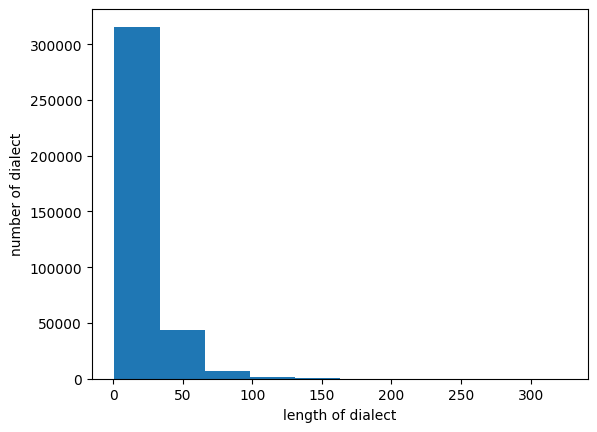

In [21]:
# 방언 문장의 길이와 그 길이에 해당되는 문장의 수
import matplotlib
import matplotlib.pyplot as plt

plt.hist([len(sentence) for sentence in dialect_okt_data], bins=10)
plt.xlabel('length of dialect')
plt.ylabel('number of dialect')
plt.show()

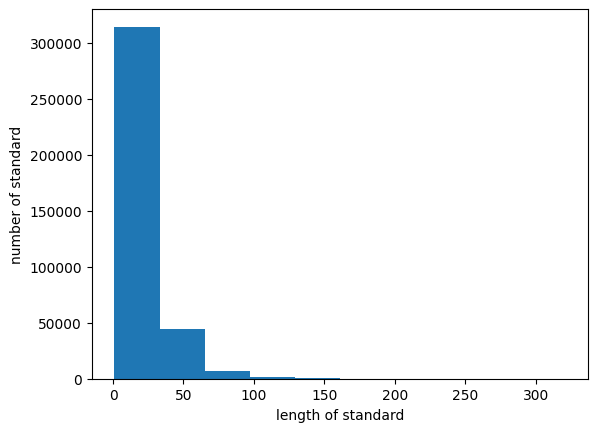

In [6]:
# 표준어 문장의 길이와 그 길이에 해당되는 문장의 수

plt.hist([len(sentence) for sentence in standard_okt_data], bins=10)
plt.xlabel('length of standard')
plt.ylabel('number of standard')
plt.show()

In [5]:
# 최대 길이로 모든 문장의 길이를 패딩하면 규모가 너무 커짐
### 함수 선언
def threshold_len_80(max_len, data):
    sentence_count=0
    for sentence in data:
        if(len(sentence) <= max_len):
            sentence_count += 1
    return sentence_count/len(data)*100

In [55]:
dialect_max_len = 40
dialect_ratio = threshold_len_80(dialect_max_len, dialect_okt_data)

standard_max_len = 40
standard_ratio = threshold_len_80(standard_max_len, standard_okt_data)

print(f"dialect 중 {dialect_max_len} 이하인 비율은 {dialect_ratio}")
print(f"standard 중 {standard_max_len} 이하인 비율은 {standard_ratio}")

s_filtered_indices = [i for i, text in enumerate(standard_okt_data) if len(text) < 40]
d_filtered_indices = [i for i, text in enumerate(dialect_okt_data) if len(text) < 40]
indices = list(set(s_filtered_indices) & set(d_filtered_indices))

dialect 중 40 이하인 비율은 90.59586090690438
standard 중 40 이하인 비율은 90.97253740267152


In [58]:
print(len(indices))
print(len(s_filtered_indices))
print(len(d_filtered_indices))

331084
332747
331215


In [10]:
# filtered_dialect_data = []
# for text in dialect_okt_data:
#     if len(text) < 50:
#         filtered_dialect_data.append(text)
#     else:
#         pass 

In [59]:
from tqdm import tqdm

filtered_standard_data = []
for i in tqdm(range(len(standard_okt_data))):
    if i in indices:
        filtered_standard_data.append(standard_okt_data[i])

filtered_dialect_data = []
for i in tqdm(range(len(dialect_okt_data))):
    if i in indices:
        filtered_dialect_data.append(dialect_okt_data[i])


100%|██████████| 367955/367955 [06:26<00:00, 951.14it/s] 


In [60]:
len(filtered_standard_data)

331084

In [61]:
len(filtered_dialect_data)

331084

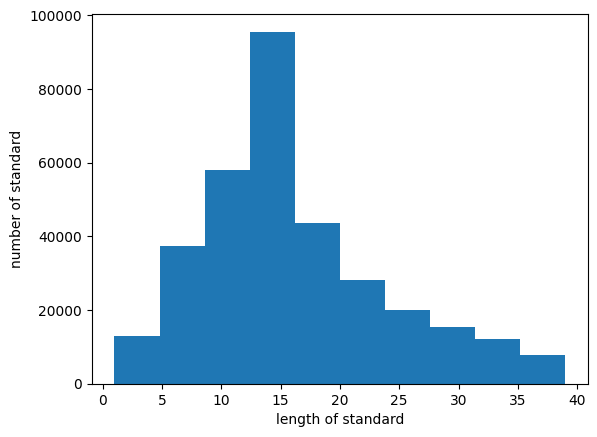

In [62]:
plt.hist([len(sentence) for sentence in filtered_standard_data], bins=10)
plt.xlabel('length of standard')
plt.ylabel('number of standard')
plt.show()

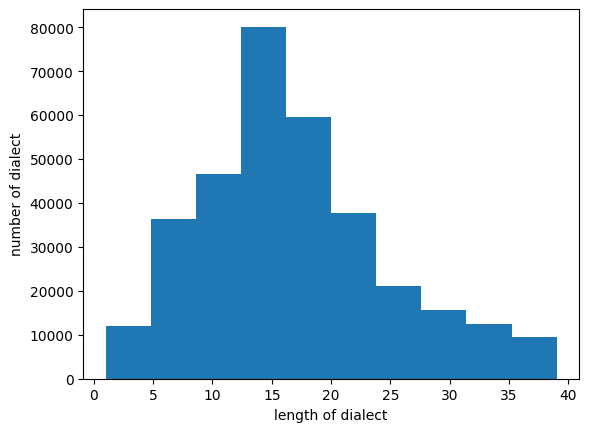

In [63]:
plt.hist([len(sentence) for sentence in filtered_dialect_data], bins=10)
plt.xlabel('length of dialect')
plt.ylabel('number of dialect')
plt.show()

In [ ]:
filtered_dialect_data

In [64]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

In [65]:
dialect_word2vec = Word2Vec(sentences=filtered_dialect_data, vector_size=100, min_count=1, window=5, workers=4)
standard_word2vec = Word2Vec(sentences=filtered_standard_data, vector_size=100, min_count=1, window=5, workers=4)

dialect_word2vec.save("dialect_word2vec.bin")
standard_word2vec.save("standard_word2vec.bin")

In [66]:
# 방언 문장의 토큰과 표준어 문장의 토큰 저장
dialect_tokens = []
standard_tokens = []

for i in range(0, len(filtered_dialect_data)):
    for standard_word in filtered_standard_data[i]:
        standard_tokens.append(standard_word)
    
    for dialect_word in filtered_dialect_data[i]:
        dialect_tokens.append(dialect_word)

In [67]:
# 각 리스트에서 중복을 제거
unique_standard_tokens = []
unique_dialect_tokens = []
seen1 = set()
seen2 = set()

for word in standard_tokens:
    if word not in seen1:
        unique_standard_tokens.append(word)
        seen1.add(word)

for word in dialect_tokens:
    if word not in seen2:
        unique_dialect_tokens.append(word)
        seen2.add(word)


In [68]:
print(f"중복 제거 전 토큰 수 >> standard: {len(standard_tokens)}, dialect: {len(dialect_tokens)}")
print(f"중복 제거 후 토큰 수 >> standard: {len(unique_standard_tokens)}, dialect: {len(unique_dialect_tokens)}")

중복 제거 전 토큰 수 >> standard: 5330978, dialect: 5583280
중복 제거 후 토큰 수 >> standard: 81882, dialect: 100844


In [69]:
tokens = standard_tokens + dialect_tokens

print(len(tokens))

10914258


In [70]:
all_tokens = standard_tokens + dialect_tokens

unique_all_tokens = []
seen3 = set()

for word in all_tokens:
    if word not in seen3:
        unique_all_tokens.append(word)
        seen3.add(word)

In [71]:
print(f"중복 제거 전 방언과 표준어의 토큰 합친 수: {len(all_tokens)}")
print(f"중복 제거 후 방언과 표준어의 토큰 합친 수: {len(unique_all_tokens)}")

중복 제거 전 방언과 표준어의 토큰 합친 수: 10914258
중복 제거 후 방언과 표준어의 토큰 합친 수: 108342


## 불용어 제거하지 않았을 때
### 중복 제거 x -> standard: 6536600, dialect: 6794654
##### => 전체 토큰 수: 13331254
### 중복 제거 o -> standard: 91751, dialect: 111884
##### => 전체 토큰 수(중복 제거 x): 13331254, (중복 제거 o): 120152

---

## 불용어 제거했을 때
### 중복 제거 x -> standard: 5250260, dialect: 5467840
##### => 전체 토큰 수: 10718100
### 중복 제거 o -> standard: 91735, dialect: 111868
##### => 전체 토큰 수(중복 제거 x): 10718100, (중복 제거 o): 120136

In [72]:
from collections import Counter

# 중복을 하나도 제거하지 않았을 때의 단어 빈도수를 계산
word_counts = Counter(tokens)

# 빈도수 높은 순서대로 정렬
sorted_word = sorted(word_counts, key=word_counts.get, reverse=True)

print(len(sorted_word))

108342


In [73]:
sorted_word[:20]

["('에', 'Josa')",
 "('이', 'Josa')",
 "('는', 'Josa')",
 "('가', 'Josa')",
 "('도', 'Josa')",
 "('을', 'Josa')",
 "('은', 'Josa')",
 "('뭐', 'Noun')",
 "('안', 'Noun')",
 "('를', 'Josa')",
 "('거', 'Noun')",
 "('때', 'Noun')",
 "('많이', 'Adverb')",
 "('그', 'Noun')",
 "('들', 'Suffix')",
 "('고', 'Josa')",
 "('것', 'Noun')",
 "('또', 'Noun')",
 "('우리', 'Noun')",
 "('좀', 'Noun')"]

In [26]:
### 단어 빈도수가 높은 것들을 출력해보니 방언과 표준어의 관계와 전혀 관련없는 조사들이 많이 포함됨
### 따라서 불용어 처리를 통해 제거가 필요함
# stop_words = ['이', '에', '는', '가', '도', '을', '뭐', '은','하고','게','에는','그', '를', '것', '으로','로']

In [74]:
word_to_id = {word: index + 1 for index, word in enumerate(unique_all_tokens)}
id_to_word = {index: word for word, index in word_to_id.items()}

In [75]:
print(len(word_to_id))
print(len(id_to_word))

## all_tokens를 이용했을 때와
## unique_all_tokens 이요했ㅇ을 때 비교

108342
108342


In [76]:
# word_to_id csv로 저장
with open('word_to_id.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    for word, idx in word_to_id.items():
        writer.writerow([word, idx])

# id_to_word csv로 저장
with open('id_to_word.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    for idx, word in id_to_word.items():
        writer.writerow([idx, word])

In [77]:
# 방언과 표준어 문장을 정수 인덱스로 변환
dialect_indices = [[word_to_id[token] for token in tokens] for tokens in filtered_dialect_data]
standard_indices = [[word_to_id[token] for token in tokens] for tokens in filtered_standard_data]

In [78]:
dialect_indices[1]

[12, 13, 14, 15, 16, 17, 1735, 19, 20, 17, 21, 1020, 1489, 745, 746, 1024]

In [79]:
# 방언과 표준어 문장에서 최대 길이를 찾음 => 패딩을 적용하기 위해
max_dialect_length = max(len(sentence) for sentence in dialect_indices)
max_standard_length = max(len(sentence) for sentence in standard_indices)

print(f"dialect 최대 길이: {max_dialect_length}, standard 최대 길이: {max_standard_length}")

dialect 최대 길이: 39, standard 최대 길이: 39


In [80]:
# 방언과 표준어 문장의 평균 길이를 계산
avg_dialect_length = sum(len(sentence) for sentence in dialect_indices) / len(dialect_indices)
avg_standard_length = sum(len(sentence) for sentence in standard_indices) / len(standard_indices)

print(f"dialect 평균 길이: {avg_dialect_length}, standard 평균 길이: {avg_standard_length}")

dialect 평균 길이: 16.863635814476083, standard 평균 길이: 16.101587512534582


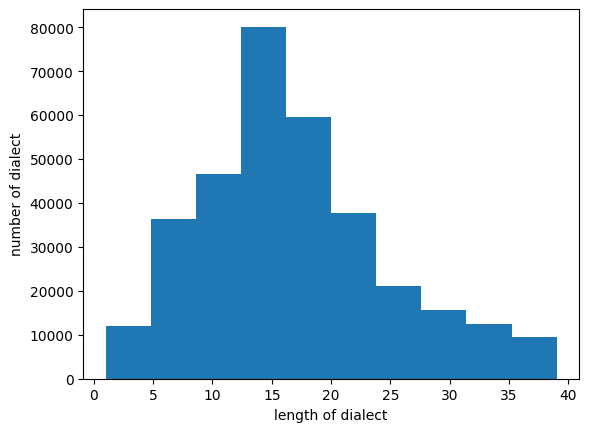

In [81]:
# 방언 문장의 길이와 그 길이에 해당되는 문장의 수
import matplotlib
import matplotlib.pyplot as plt

plt.hist([len(sentence) for sentence in dialect_indices], bins=10)
plt.xlabel('length of dialect')
plt.ylabel('number of dialect')
plt.show()

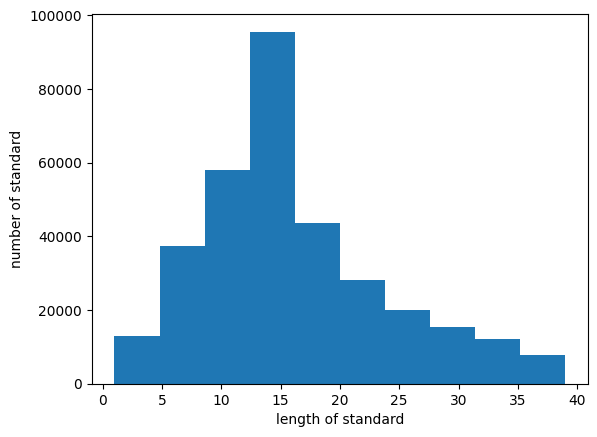

In [82]:
# 표준어 문장의 길이와 그 길이에 해당되는 문장의 수
plt.hist([len(sentence) for sentence in standard_indices], bins=10)
plt.xlabel('length of standard')
plt.ylabel('number of standard')
plt.show()

In [18]:
# # 최대 길이로 모든 문장의 길이를 패딩하면 규모가 너무 커짐
# ### 함수 선언
# def threshold_len_80(max_len, data):
#     sentence_count=0
#     for sentence in data:
#         if(len(sentence) <= max_len):
#             sentence_count += 1
#     return sentence_count/len(data)*100

In [ ]:
# dialect_max_len = 50
# dialect_ratio = threshold_len_80(dialect_max_len, dialect_indices)

# standard_max_len = 50
# standard_ratio = threshold_len_80(standard_max_len, standard_indices)

# print(f"dialect 중 {dialect_max_len} 이하인 비율은 {dialect_ratio}")
# print(f"standard 중 {standard_max_len} 이하인 비율은 {standard_ratio}")

In [47]:
type(standard_indices)

list

In [ ]:
standard_indices

In [ ]:
dialect_indices

In [22]:
filtered_standard_indices = []
for text in standard_indices:
    if len(text) < 50:
        filtered_standard_indices.append(text)
    else:
        pass 

In [24]:
len(filtered_standard_indices)

347963

In [55]:
# filtered_dialect_indices = []
# for text in dialect_indices:
#     if len(text) < 50:
#         filtered_dialect_indices.append(text)
#     else:
#         pass 

In [35]:
# 위와 마찬가지
filtered_id = [i for i, text in enumerate(standard_indices) if len(text) < 50]
filtered_dialect_indices = [text for i, text in enumerate(dialect_indices) if i in filtered_id]

In [26]:
len(standard_indices)

367955

In [27]:
len(filtered_dialect_indices)

347963

In [28]:
type(standard_indices)

list

In [29]:
type(dialect_indices)

list

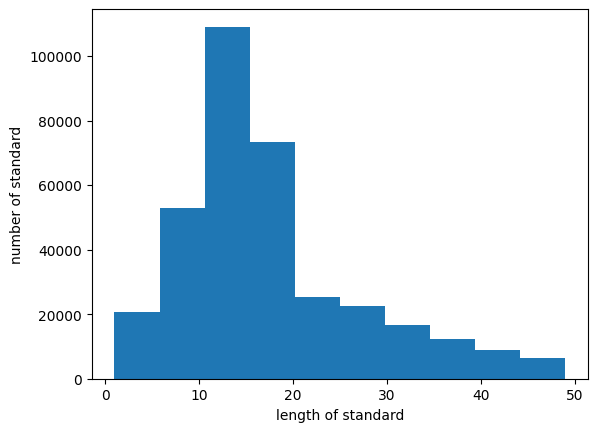

In [36]:
plt.hist([len(sentence) for sentence in filtered_standard_indices], bins=10)
plt.xlabel('length of standard')
plt.ylabel('number of standard')
plt.show()

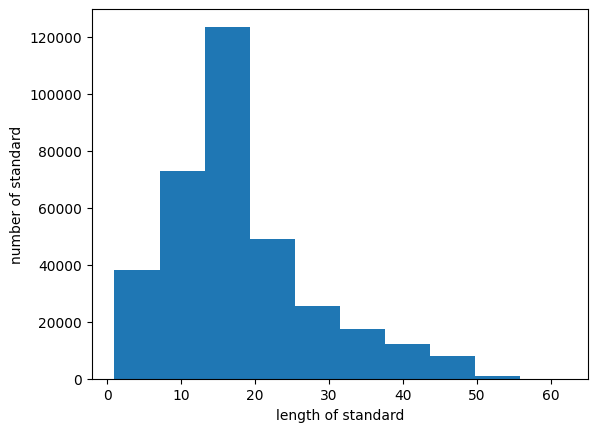

In [37]:
plt.hist([len(sentence) for sentence in filtered_dialect_indices], bins=10)
plt.xlabel('length of standard')
plt.ylabel('number of standard')
plt.show()

In [85]:
with open('standard_indices.csv', 'w', encoding='utf-8', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(standard_indices)

with open('dialect_indices.csv', 'w', encoding='utf-8', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(dialect_indices)

In [84]:
d_M_l = max(len(sentence) for sentence in dialect_indices)
s_M_l = max(len(sentence) for sentence in standard_indices)
d_m_l = min(len(sentence) for sentence in dialect_indices)
s_m_l = min(len(sentence) for sentence in standard_indices)

print(f"standard padding 리스트의 최대 길이: {s_M_l}")
print(f"dialect padding 리스트의 최대 길이: {d_M_l}")
print(f"standard padding 리스트의 최소 길이: {s_m_l}")
print(f"dialect padding 리스트의 최소 길이: {d_m_l}")

standard padding 리스트의 최대 길이: 39
dialect padding 리스트의 최대 길이: 39
standard padding 리스트의 최소 길이: 1
dialect padding 리스트의 최소 길이: 1


In [ ]:
# filtered_dialect_indices

In [ ]:
# filtered_standard_indices

In [86]:
dialect_padding = []
standard_padding = []

for sentence in dialect_indices:
    # 작은 것은 0으로 제로 패딩
    if len(sentence) <= 40:
        padded_sentence = sentence + [0] * (40 - len(sentence))
        dialect_padding.append(padded_sentence)

for sentence in standard_indices:
    if len(sentence) <= 40:
        padded_sentence = sentence + [0] * (40 - len(sentence))
        standard_padding.append(padded_sentence)

In [87]:
d_M_l = max(len(sentence) for sentence in dialect_padding)
s_M_l = max(len(sentence) for sentence in standard_padding)
d_m_l = min(len(sentence) for sentence in dialect_padding)
s_m_l = min(len(sentence) for sentence in standard_padding)

print(f"standard padding 리스트의 최대 길이: {s_M_l}")
print(f"dialect padding 리스트의 최대 길이: {d_M_l}")
print(f"standard padding 리스트의 최소 길이: {s_m_l}")
print(f"dialect padding 리스트의 최소 길이: {d_m_l}")

standard padding 리스트의 최대 길이: 40
dialect padding 리스트의 최대 길이: 40
standard padding 리스트의 최소 길이: 40
dialect padding 리스트의 최소 길이: 40


In [88]:
# 정수화된 방언 문장 csv로 저장
with open('dialect_padding_data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    for indices in dialect_padding:
        writer.writerow(indices)

# 정수화된 표준어 문장 csv로 저장
with open('standard_padding_data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    for indices in standard_padding:
        writer.writerow(indices)

In [ ]:
dialect_padding